# 🤖 Robo-Advisor ML Project: Portfolio Optimization
This notebook performs portfolio optimization using historical price data from selected financial assets. It calculates expected returns, risk, Sharpe ratio, and visualizes the efficient frontier.

In [1]:
# Install necessary libraries (if not already installed)
!pip install yfinance matplotlib pandas numpy seaborn

## 📥 Download Financial Data from Yahoo Finance

In [5]:
import yfinance as yf
import pandas as pd

# Define tickers and download data
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
data = yf.download(tickers, start='2020-01-01', end='2024-12-31')
# Access 'Close' level from the MultiIndex columns
df = data['Close'].dropna()
df.tail()

/tmp/ipython-input-5-2252750750.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,META,MSFT
Date,,,,,
2024-12-23,254.655716,225.059998,194.171051,598.856018,433.583038
2024-12-24,257.578674,229.050003,195.647552,606.742920,437.647369
2024-12-26,258.396667,227.050003,195.138763,602.350220,436.432068
2024-12-27,254.974930,223.750000,192.305450,598.816040,428.881104
2024-12-30,251.593079,221.300003,190.789032,590.260254,423.202911


## 🧮 Calculate Returns and Risk Metrics

In [6]:
returns = df.pct_change().dropna()
mean_returns = returns.mean()
cov_matrix = returns.cov()
mean_returns, cov_matrix

(Ticker
 AAPL     0.001189
 AMZN     0.000931
 GOOGL    0.001031
 META     0.001234
 MSFT     0.000995
 dtype: float64,
 Ticker      AAPL      AMZN     GOOGL      META      MSFT
 Ticker                                                  
 AAPL    0.000398  0.000268  0.000265  0.000318  0.000287
 AMZN    0.000268  0.000514  0.000300  0.000390  0.000295
 GOOGL   0.000265  0.000300  0.000419  0.000371  0.000294
 META    0.000318  0.000390  0.000371  0.000801  0.000337
 MSFT    0.000287  0.000295  0.000294  0.000337  0.000369)

## 🔁 Simulate Portfolios and Calculate Sharpe Ratio

In [7]:
import numpy as np

def simulate_portfolios(returns, n_portfolios=5000, risk_free_rate=0.01):
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    results = np.zeros((3, n_portfolios))
    weights_record = []
    for i in range(n_portfolios):
        weights = np.random.random(len(returns.columns))
        weights /= np.sum(weights)
        weights_record.append(weights)
        port_return = np.dot(weights, mean_returns)
        port_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = (port_return - risk_free_rate) / port_std
        results[0,i] = port_return
        results[1,i] = port_std
        results[2,i] = sharpe_ratio
    return results, weights_record

results, weights_record = simulate_portfolios(returns)

## 📊 Visualize Efficient Frontier and Optimal Portfolio

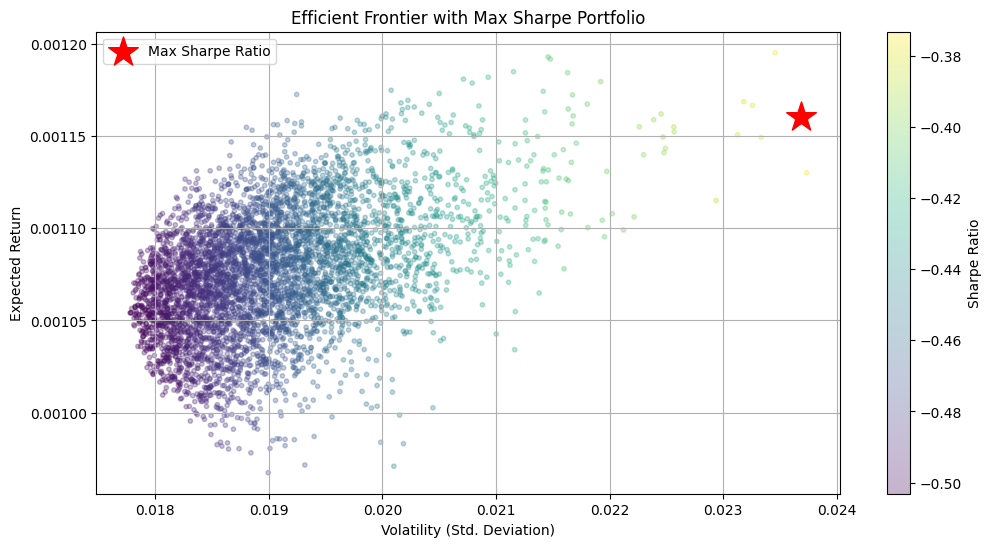

In [8]:
import matplotlib.pyplot as plt

max_sharpe_idx = np.argmax(results[2])
sdp, rp = results[1, max_sharpe_idx], results[0, max_sharpe_idx]
max_sharpe_allocation = pd.Series(weights_record[max_sharpe_idx], index=returns.columns)

plt.figure(figsize=(12, 6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(sdp, rp, marker='*', color='r', s=500, label='Max Sharpe Ratio')
plt.title('Efficient Frontier with Max Sharpe Portfolio')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Return')
plt.legend(labelspacing=0.8)
plt.grid(True)
plt.savefig('efficient_frontier.png')
plt.show()

## 🥧 Pie Chart of Optimal Allocation

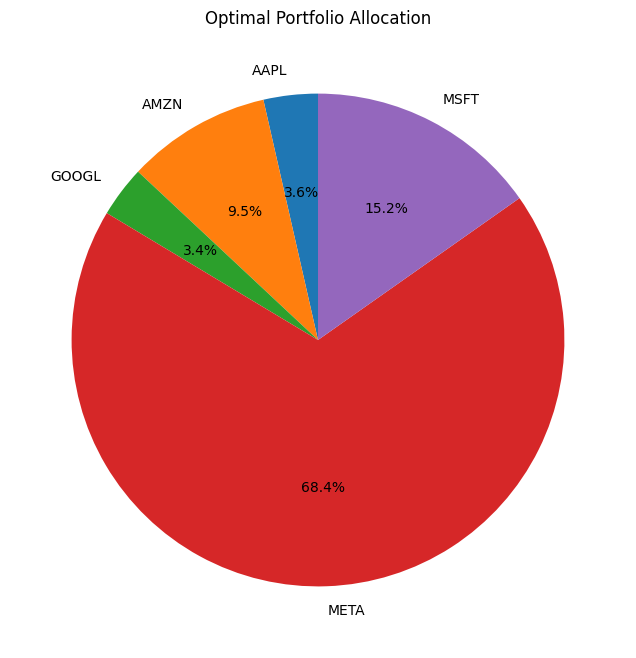

In [9]:
max_sharpe_allocation.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90)
plt.title('Optimal Portfolio Allocation')
plt.ylabel('')
plt.savefig('optimal_allocation.png')
plt.show()

In [4]:
print(data.columns)

MultiIndex([( 'Close',  'AAPL'),
            ( 'Close',  'AMZN'),
            ( 'Close', 'GOOGL'),
            ( 'Close',  'META'),
            ( 'Close',  'MSFT'),
            (  'High',  'AAPL'),
            (  'High',  'AMZN'),
            (  'High', 'GOOGL'),
            (  'High',  'META'),
            (  'High',  'MSFT'),
            (   'Low',  'AAPL'),
            (   'Low',  'AMZN'),
            (   'Low', 'GOOGL'),
            (   'Low',  'META'),
            (   'Low',  'MSFT'),
            (  'Open',  'AAPL'),
            (  'Open',  'AMZN'),
            (  'Open', 'GOOGL'),
            (  'Open',  'META'),
            (  'Open',  'MSFT'),
            ('Volume',  'AAPL'),
            ('Volume',  'AMZN'),
            ('Volume', 'GOOGL'),
            ('Volume',  'META'),
            ('Volume',  'MSFT')],
           names=['Price', 'Ticker'])
